# Literature comparisons

We want to make a comparisonb etween our stars and literature values. We'll do this twice:
- One comparison to LEGACY and Kages
- One comparison to published asteroseismic rotation rates

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u

sns.set_palette('colorblind')
sns.set_context('poster')

In [2]:
ati = pd.read_csv('../data/atium.csv',index_col=0)
ati = ati[ati.eye_flag != 3]
ati = ati[np.isfinite(ati.nus.values)]
print(f'We have {len(ati)} stars with results')

We have 94 stars with results


Read in the LEGACY & Kages literature results

In [3]:
col = pd.read_csv('../data/LK_private.csv', index_col=0)
col.head(2)

,KIC,i,u_i,l_i,nus,l_nus,u_nus,nus*,l_nus*,u_nus*,P,l_P,u_P,label
0,1435467,57.190635,11.73913,8.729097,1.653867,0.26038,0.212415,1.356938,0.088360,0.106032,8.529554,0.078141,0.065117,L
1,2837475,82.474916,5.41806,7.224080,2.680312,0.15924,0.156055,2.607719,0.145851,0.145851,4.438390,0.055930,0.055930,L


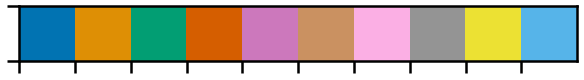

In [4]:
cmap = sns.color_palette('colorblind')
sns.palplot(cmap)

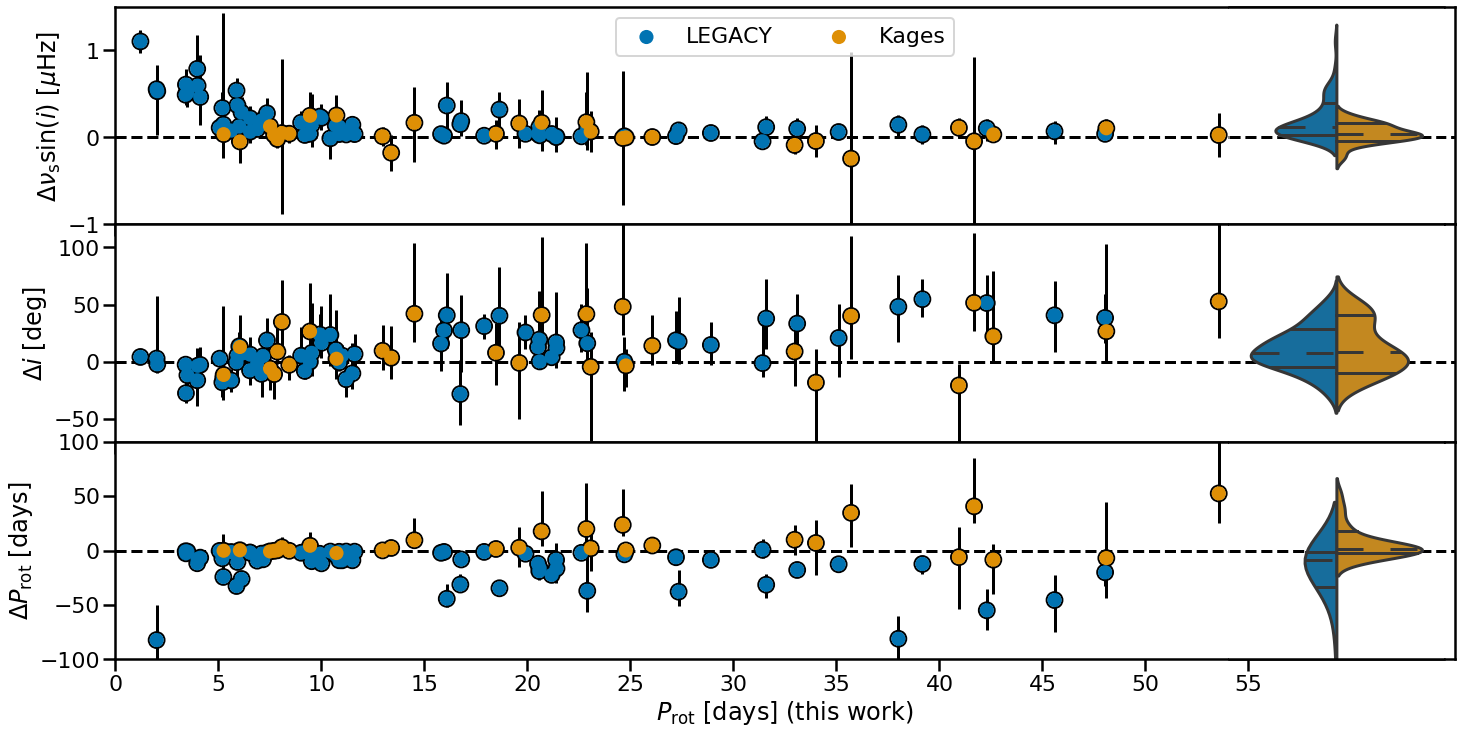

In [49]:
size=200
col['x'] = np.ones(len(col)) * 60

fig, axes = plt.subplots(3, 1, figsize=(24,12), sharex=True)

ax0 = axes[0]
ax1 = axes[1]
ax2 = axes[2]

pk = ati['P'][ati.source == 'K']
pl = ati['P'][ati.source == 'L']

ak = ati['nus*'][ati.source == 'K']
ck = col['nus*'][ati.source == 'K']
al = ati['nus*'][ati.source == 'L']
cl = col['nus*'][ati.source == 'L']
upper = np.sqrt(ati['u_nus*']**2 + col['u_nus*']**2)
lower = np.sqrt(ati['l_nus*']**2 + col['l_nus*']**2)
ax0.scatter(pl, al-cl, s=size, ec='None', lw=1, zorder = 3, label='LEGACY')
ax0.scatter(pk, ak-ck, s=size, ec='None', lw=1, zorder = 3, label='Kages')

ax0.scatter(pk, ak-ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.scatter(pl, al-cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2)
ax0.axhline(0., ls='--', zorder=1, c='k')
ax0.errorbar(ati['P'], ati['nus*']-col['nus*'], yerr=[lower, upper],
             fmt='|', zorder=2, c='k')
ax0.set_ylabel(r'$\Delta\nu_{\rm s}\sin(i)$ [$\mu$Hz]')
# ax0.set_title(r'$\Delta \equiv$(this work - literature)')

ak = np.rad2deg(ati['i'][ati.source == 'K'])
ck = col['i'][ati.source == 'K']
al = np.rad2deg(ati['i'][ati.source == 'L'])
cl = col['i'][ati.source == 'L']
upper = np.sqrt(np.rad2deg(ati['u_i'])**2 + col['u_i']**2)
lower = np.sqrt(np.rad2deg(ati['l_i'])**2 + col['l_i']**2)
ax1.scatter(pl, al-cl, s=size, ec='None', lw=1, zorder = 3, label='L')
ax1.scatter(pk, ak-ck, s=size, ec='None', lw=1, zorder = 3, label='K')

ax1.scatter(pk, ak-ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='K')
ax1.scatter(pl, al-cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='L')
ax1.axhline(0., ls='--', zorder=1, c='k')
ax1.errorbar(ati['P'], np.rad2deg(ati['i'])-col['i'], yerr=[lower, upper],
             fmt='|', zorder=2, c='k')
ax1.set_ylabel(r'$\Delta i$ [deg]')

ak = ati['P'][ati.source == 'K']
ck = col['P'][ati.source == 'K']
al = ati['P'][ati.source == 'L']
cl = col['P'][ati.source == 'L']
upper = np.sqrt(ati['u_P']**2 + col['u_P']**2)
lower = np.sqrt(ati['l_P']**2 + col['l_P']**2)
ax2.scatter(pl, al-cl, s=size, ec='None', lw=1, zorder = 3, label='L')
ax2.scatter(pk, ak-ck, s=size, ec='None', lw=1, zorder = 3, label='K')

ax2.scatter(pk, ak-ck, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='K')
ax2.scatter(pl, al-cl, s=size+50, ec='k', lw=2, fc='None', zorder = 2, label='L')
ax2.axhline(0., ls='--', zorder=1, c='k')
ax2.errorbar(ati['P'], ati['P']-col['P'], yerr=[lower, upper],
            fmt='|', zorder=2, c='k')
ax2.set_ylabel(r'$\Delta P_{\rm rot}$ [days]')
ax2.set_ylim(-100, 100)
ax2.set_xlabel(r'$P_{\rm rot}$ [days] (this work)')

plt.subplots_adjust(hspace=0)

from mpl_toolkits.axes_grid.inset_locator import inset_axes
col['Dnus*'] = ati['nus*'] - col['nus*']
col['Di'] = np.rad2deg(ati['i']) - col['i']
col['DP'] = ati['P'] - col['P']

# Violin 1
iax0 = inset_axes(ax0, height ="100%", width="16%", loc=7)
sns.violinplot(x='x', y='Dnus*', hue='label', 
               inner='quartile',
               data=col, palette=cmap, split=True, ax = iax0, legend=False)
iax0.spines['right'].set_visible(False)
iax0.spines['left'].set_visible(False)
iax0.get_xaxis().set_visible(False)
iax0.get_yaxis().set_visible(False)
iax0.axhline(0, ls='--', c='k', zorder=0)
iax0.legend_.remove()
ax0.set_ylim(-1, 1.5)
iax0.set_ylim(-1, 1.5)

# Violin 2
iax1 = inset_axes(ax1, height ="100%", width="16%", loc=7)
sns.violinplot(x='x', y='Di', hue='label', data=col, 
                inner='quartile',
                palette=cmap, split=True, ax = iax1, legend=False)
iax1.spines['right'].set_visible(False)
iax1.spines['left'].set_visible(False)
iax1.get_xaxis().set_visible(False)
iax1.get_yaxis().set_visible(False)
iax1.axhline(0, ls='--', c='k', zorder=0)
iax1.legend_.remove()
ax1.set_ylim(-70, 120)
iax1.set_ylim(-70, 120)

# Violin 2
iax2 = inset_axes(ax2, height ="100%", width="16%", loc=7)
sns.violinplot(x='x', y='DP', hue='label', data=col,
                inner='quartile',
                palette=cmap, split=True, ax = iax2, legend=False)
iax2.spines['right'].set_visible(False)
iax2.spines['left'].set_visible(False)
iax2.get_xaxis().set_visible(False)
iax2.get_yaxis().set_visible(False)
iax2.axhline(0, ls='--', c='k', zorder=0)
iax2.legend_.remove()
ax2.set_xlim(0, 65)
ax2.set_ylim(-100, 100)
iax2.set_ylim(-100, 100)
ax0.legend(ncol=2, loc='upper center')# bbox_to_anchor=[0.63,1.25,0.0,0.0])

ax2.set_xticks(np.arange(0, 60, 5))

plt.savefig('/home/oliver/Dropbox/Apps/Overleaf/Malatium/Images/litcomp.pdf', rasterized=True)

Practice with the violinplot

TypeError: No loop matching the specified signature and casting was found for ufunc add

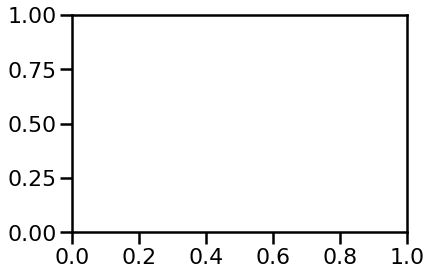

In [6]:
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]
x = np.ones(len(data))
fig, ax = plt.subplots()
sns.violinplot(x=x, y=data)